# Problem Statement
This project will cover a classification problem regarding the prediction of loan approvals. This will be done using the prospective candidates financial and other related credentials. The following steps will be performed:
*   Setup imports
*   Load and briefly explore the data
*   Clean the data
*   Perform Extenstive Exploratory Data Analysis (EDA)
*   Create the Models + Analyze the results
*   Conclusion



## Setup Imports

In [42]:
## Import require packages

import pandas as pd
from collections import Counter
import locale
from matplotlib import pyplot as plt
import seaborn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.utils import resample

In [2]:
import warnings
warnings.filterwarnings('ignore') # To clean up cell output

## Load Data and Data Exploration
Load the dataset and print various statistics about the data to determine what we are working with and what may need to be cleaned.

Sourced:

Loan-Approval-Prediction-Dataset. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data

In [43]:
## Load and display the data

filepath = "loan_approval_dataset.csv" # Filepath may need altering based on data location
data = pd.read_csv(filepath, engine = "python")
data_len = len(data)
print("Number of observations:", data_len)
data.head()

Number of observations: 4269


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000,"$29,900,000.00",12,778,2400000,17600000,22700000,"$8,000,000.00",Approved
1,2,0.0,Not Graduate,Yes,4100000,"$12,200,000.00",8,417,2700000,2200000,8800000,"$3,300,000.00",Rejected
2,3,3.0,Graduate,No,9100000,"$29,700,000.00",20,506,7100000,4500000,33300000,"$12,800,000.00",Rejected
3,4,NaN,Graduate,No,8200000,"$30,700,000.00",8,467,18200000,3300000,23300000,"$7,900,000.00",Rejected
4,5,NaN,Not Graduate,Yes,9800000,"$24,200,000.00",20,382,12400000,8200000,29400000,"$5,000,000.00",Rejected


Analyze Features

In [5]:
print(data.dtypes) # Some conversion and data cleaning is required based on dtypes
print(data.columns)

loan_id                       int64
no_of_dependents            float64
education                    object
self_employed                object
income_annum                  int64
loan_amount                  object
loan_term                     int64
cibil_score                   int64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value             object
loan_status                  object
dtype: object
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [6]:
# Cell going over statistics of missing values, incorrect version, None type values, wrong dtypes
print("Number of dependents options:", Counter(data['no_of_dependents']))
print("Loan status options:", Counter(data['loan_status']))

Number of dependents options: Counter({4.0: 735, 3.0: 710, 0.0: 697, 2.0: 690, 1.0: 680, 5.0: 650, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
Loan status options: Counter({'Approved': 26

### Data Exploration Results
Based on our dataset we have 12 columns that can be used as a predictor and 1 column "loan_status" that is to be predicted on. Loan ID is just an arbitrary descriptor so it will be ignored for the rest of this project. The following issues with the dataset that need to be cleaned to prepare for data analysis are as follows:


*   no_of_dependents has missing values "NaN" that necessiates the rows be removed.
*   loan_amount is in the string form currency and needs to be converted to a numerical value to proper usage in classification.
*   bank_asset_value is also in the string form currency, which needs to be converted to a numerical value.
*   loan_status is the most important column here, and it contains missing values in the form of empty strings, meaning these rows need to be removed entirely.





## Data Cleaning
In this section, we remove rows where a column has a missing value. We will also convert the currency values of columns to numeric based values so their value can be properly used for classification (raw value and not as separate dummy variables). We will also drop the loan_id column as this attribute does not provide any predictive value due to it being a simple ID increment.

In [7]:
data.dropna(subset = ['no_of_dependents'], inplace = True)
new_total = len(data)
print(f"Number of observations removed {data_len - len(data)} and new total {new_total}")

Number of observations removed 107 and new total 4162


In [8]:
data.dropna(subset = ['loan_status'], inplace = True)
print(f"Number of observations removed {new_total - len(data)} and new total {len(data)}")
new_total = len(data)

Number of observations removed 74 and new total 4088


In [9]:
locale.setlocale(locale.LC_ALL, '')
def reformat_currency_value(amount):
    return locale.atof(amount[1:])
data['loan_amount'] = data['loan_amount'].apply(reformat_currency_value)
data['bank_asset_value'] = data['bank_asset_value'].apply(reformat_currency_value)

In [10]:
data.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000,29900000.0,12,778,2400000,17600000,22700000,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000,12200000.0,8,417,2700000,2200000,8800000,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000,29700000.0,20,506,7100000,4500000,33300000,12800000.0,Rejected
5,6,0.0,Graduate,Yes,4800000,13500000.0,10,319,6800000,8300000,13700000,5100000.0,Rejected
6,7,5.0,Graduate,No,8700000,33000000.0,4,678,22500000,14800000,29200000,4300000.0,Approved


### Data Cleaning Result
As the following cell indicates, the observations with missing values have been removed. We have also succesfully converted the "loan_amount" and "bank_asset_value" columns to numerical form.

In [11]:
print(f"Total removed observations: {data_len - len(data)} and new total: {len(data)}")
data.head()

Total removed observations: 181 and new total: 4088


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000,29900000.0,12,778,2400000,17600000,22700000,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000,12200000.0,8,417,2700000,2200000,8800000,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000,29700000.0,20,506,7100000,4500000,33300000,12800000.0,Rejected
5,6,0.0,Graduate,Yes,4800000,13500000.0,10,319,6800000,8300000,13700000,5100000.0,Rejected
6,7,5.0,Graduate,No,8700000,33000000.0,4,678,22500000,14800000,29200000,4300000.0,Approved


## Exploratory Data Analysis
In this section, we will examine the cleaned data, providing insights and the appropriate analysis based on aspects such as numeric verse string type.

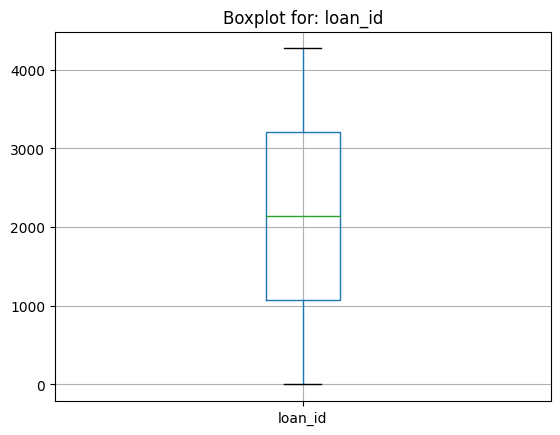

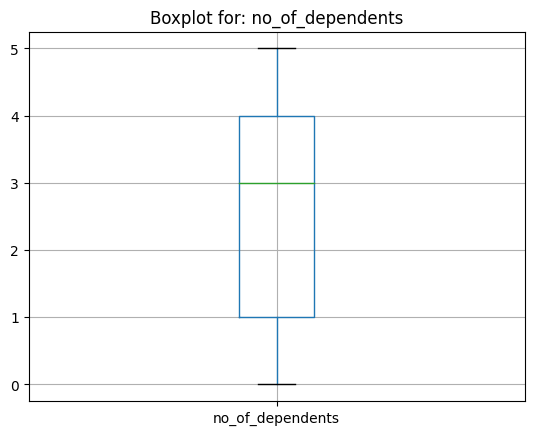

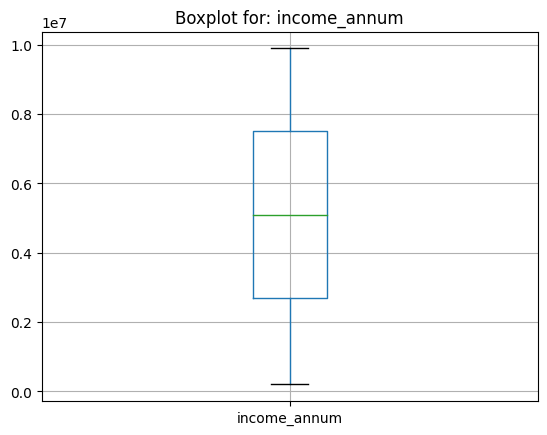

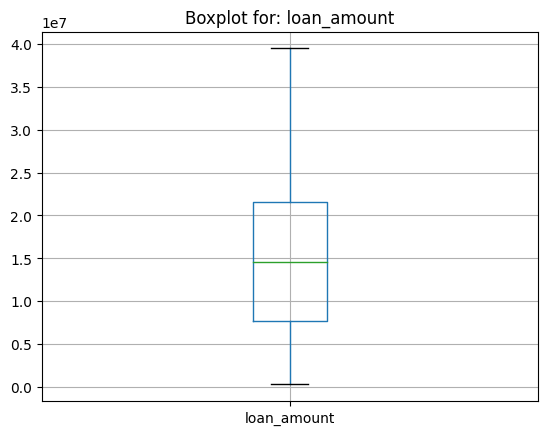

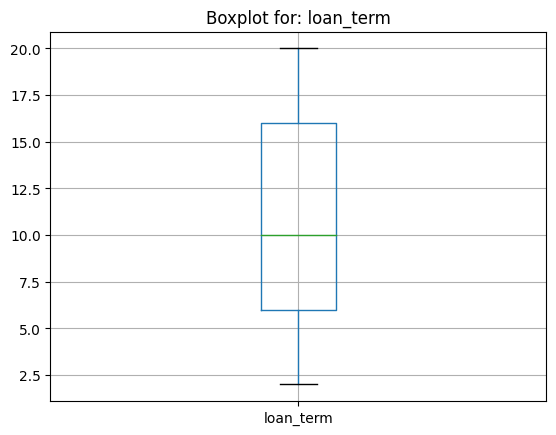

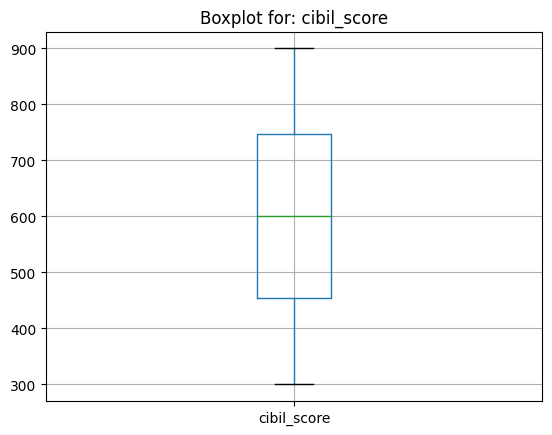

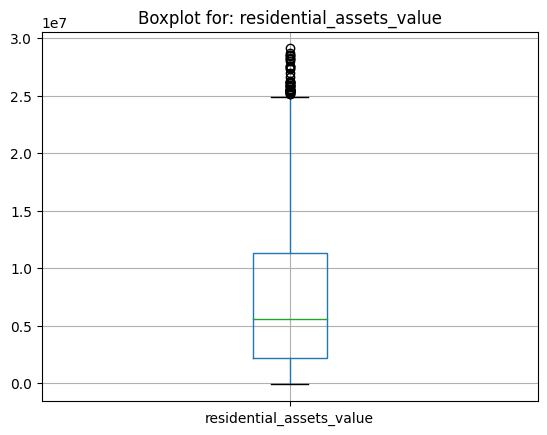

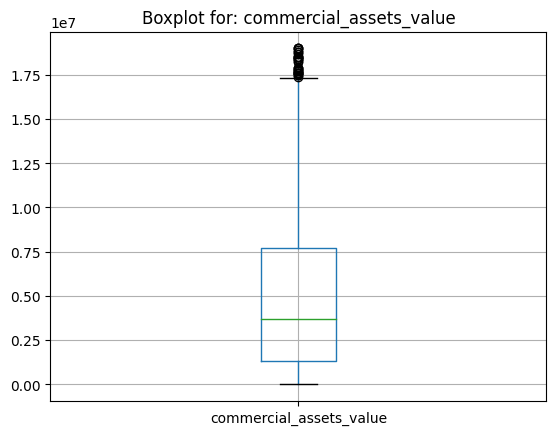

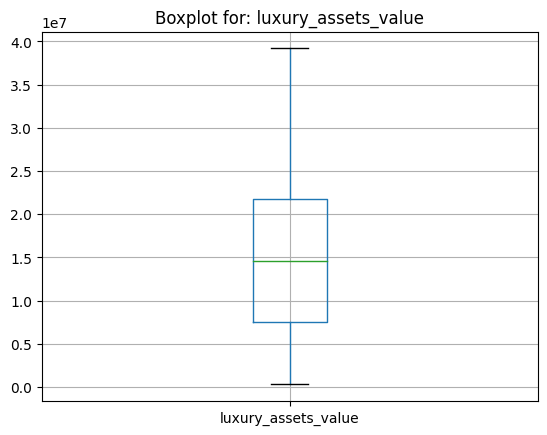

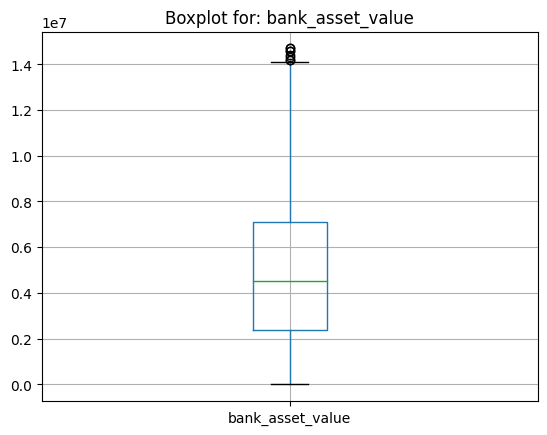

In [12]:
## Generate boxplots of each numeric variable type

for col in data.select_dtypes(include = ['number']):
  plt.figure()
  data.boxplot([col])
  plt.title(f'Boxplot for: {col}')
  plt.show()

The boxplots indicate that most of the features follow a Gaussian distribution, with the exceptions of skewing in the following variables:

*   residential_assets_value
*   commercial_assets_value
*   bank_asset_value

I don't want to perform transformations such as log or exponential transformations at this time. This is due to this being a financial dataset and large incomes (income_annum) or large loan requests (loan_amount), for example can intutively have a significant impact on whether the loan was approved or rejected.

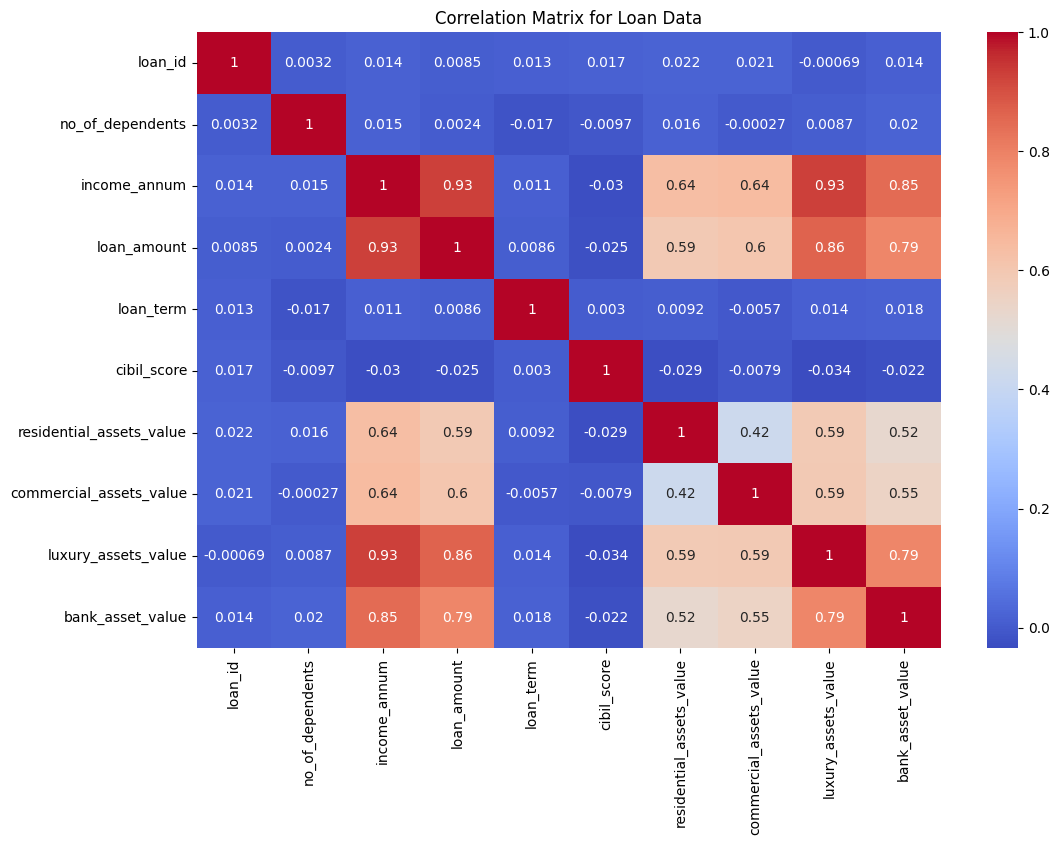

In [13]:
## Display a correlation matrix for the numeric attributes of the dataframe

numeric_cols = data.select_dtypes(include = ['number'])
cor = numeric_cols.corr()
plt.figure(figsize=(12, 8))
seaborn.heatmap(cor, cmap = 'coolwarm', annot = True)
plt.title('Correlation Matrix for Loan Data')
plt.show()

The correlation plot also shows moderate correlation between the variable combinations colored light orange / tan and strong correlations between the darker orange / red boxes (with exception of the diagonal). Generally, loan_amount and income_annum are variables that have stronger correlations with others. This indicates we may not gain much performance by including all variables in model creation section later.


In [14]:
## Analyze the string variable types, including dependent variable of interest: loan_status

# Display the counter of each string variable type to determine the distribution of values
for col in data.select_dtypes(include = ['object']):
  print(f"Counter for {col}: {Counter(data[col])}")

# Display the ratio of Approved to Rejected in regards to loan_status
approved = data['loan_status'].value_counts().get('Approved')
rejected = data['loan_status'].value_counts().get('Rejected')
print(f"The ratio of approved to rejected is approximately: {round(approved/rejected, 3)}")

Counter for education: Counter({'Graduate': 2048, 'Not Graduate': 2040})
Counter for self_employed: Counter({'Yes': 2056, 'No': 2032})
Counter for loan_status: Counter({'Approved': 2553, 'Rejected': 1535})
The ratio of approved to rejected is approximately: 1.663


Based on the text (object) analysis of the dataframe, the education and self_employed columns display a close to 1:1 ratio of each possibility. However, the 'Approved' outcome in loan_status includes about 1000 more observations than the 'Rejected' outcome, meaning that we will have to account for this class imbalance. The options for creating our models later include balancing the classes by randomly selecting 'Approved' rows and removing them to downsample this class to match the 'Rejected' column. The other option would be to utilize a metric such as ROC to use a none 0.5 threshold to determine classifications, which would help mitigate issues of the class imbalance.

We will now generate plots that group the observations by whether they resulted in an 'Approved' or 'Rejected' outcome.

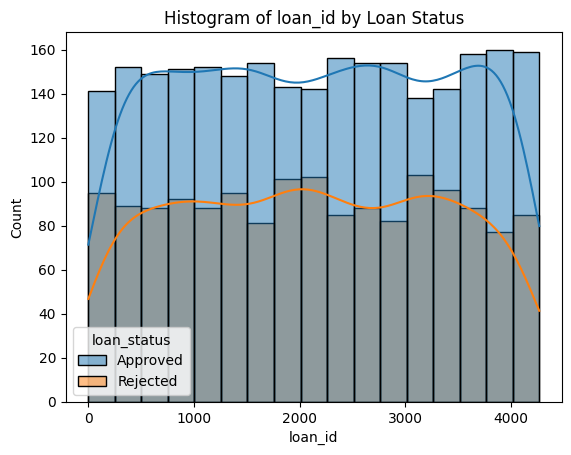

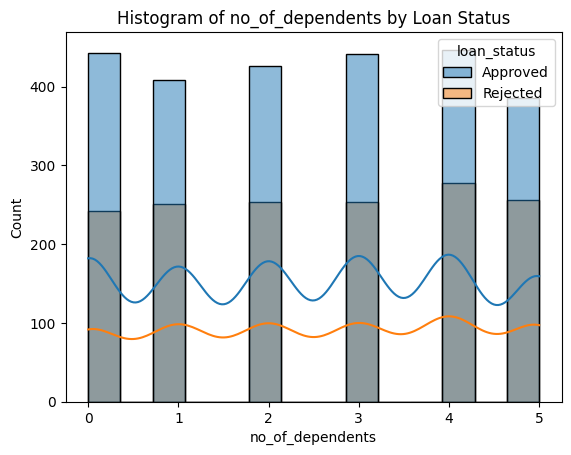

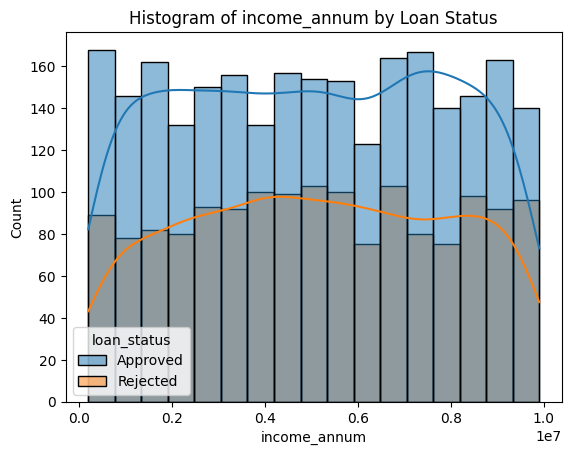

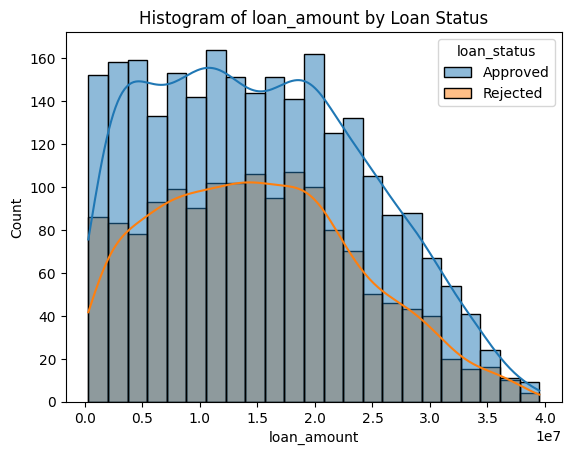

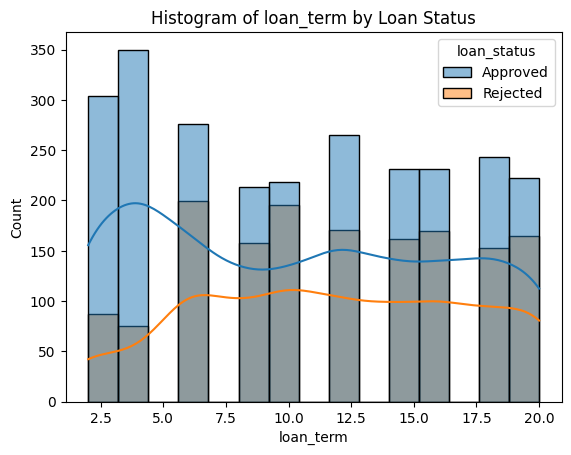

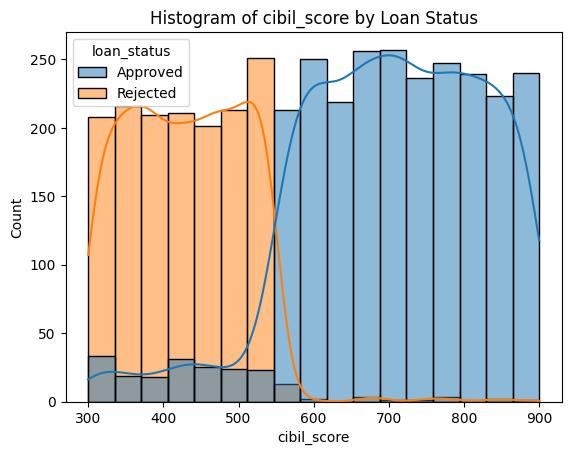

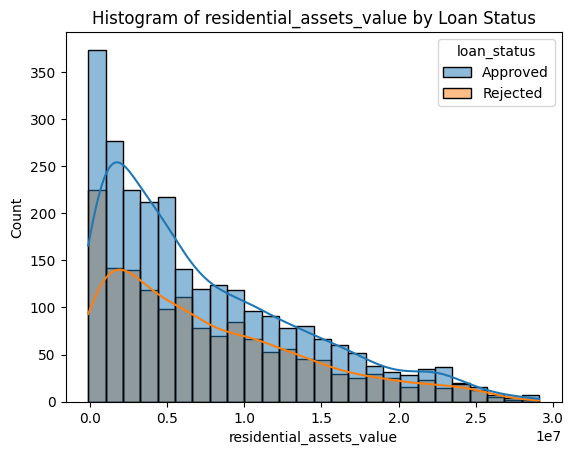

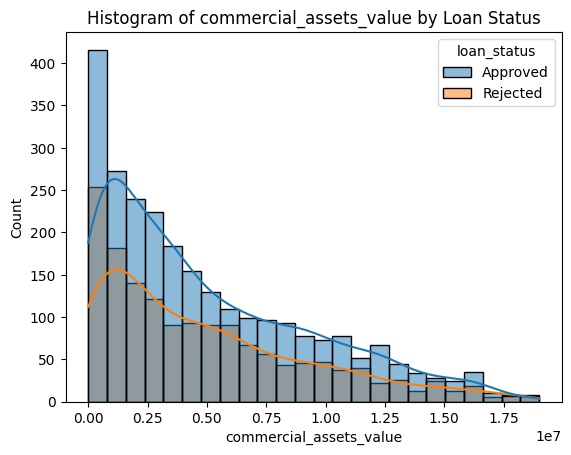

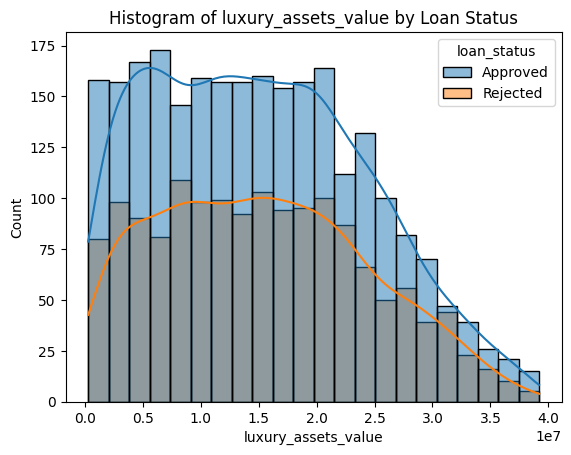

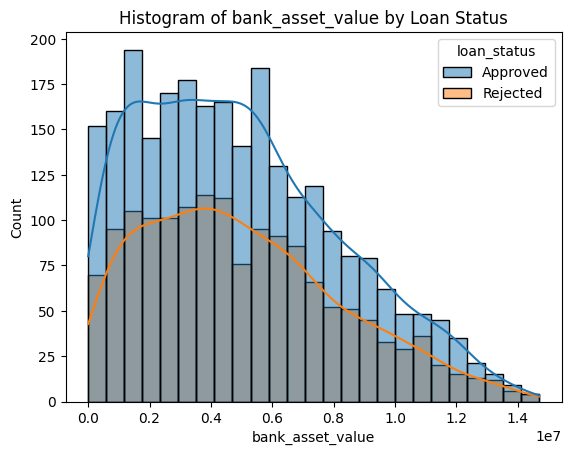

In [15]:
## Creates histograms for all numeric attributes in data, grouping by the predicted variable loan_status

for col in data.select_dtypes(include = ['number']):
  plt.figure()
  seaborn.histplot(data, x = col, kde = True, hue = 'loan_status')
  plt.title(f'Histogram of {col} by Loan Status')
  plt.show()


Interestingly, cibil_score appears to have the greatest difference in value distribution based on loan_status. However, all variables will still be considered for model selection.

In [16]:
## Display the value quanitity of each non numeric predictor variable, grouping by the loan_status column

for col in data.select_dtypes(include = ['object']):
  if col != 'loan_status':
    print(f"Counter for {col} grouped by loan_status:")
    for status in data['loan_status'].unique():
      loan_status_quantity = data['loan_status'].value_counts().get(status)
      print(f"  Loan Status: {status}, Total sum = {loan_status_quantity}")
      data_str_counter = Counter(data[data['loan_status'] == status][col])
      for counter_val in data_str_counter:
        print(f"    {counter_val}: Total: {data_str_counter[counter_val]}, Proportionally: {round(data_str_counter[counter_val] / loan_status_quantity, 3)}")
    print("")


Counter for education grouped by loan_status:
  Loan Status: Approved, Total sum = 2553
    Graduate: Total: 1284, Proportionally: 0.503
    Not Graduate: Total: 1269, Proportionally: 0.497
  Loan Status: Rejected, Total sum = 1535
    Not Graduate: Total: 771, Proportionally: 0.502
    Graduate: Total: 764, Proportionally: 0.498

Counter for self_employed grouped by loan_status:
  Loan Status: Approved, Total sum = 2553
    No: Total: 1270, Proportionally: 0.497
    Yes: Total: 1283, Proportionally: 0.503
  Loan Status: Rejected, Total sum = 1535
    Yes: Total: 773, Proportionally: 0.504
    No: Total: 762, Proportionally: 0.496



Based on the above findings, the number of 'Approved' and 'Rejected' loans was very similar proportionally across applicants that did or did not graduate. The same was found with the self employed status of the applicant. This indicates these columns will not serve as good predictor variables for loan status.

In [17]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4088.000000,4088.000000,4.088000e+03,4.088000e+03,4088.000000,4088.000000,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03
mean,2138.758072,2.499511,5.061570e+06,1.516167e+07,10.872798,600.757583,7.470401e+06,4.992588e+06,1.513075e+07,4.975318e+06
std,1230.837872,1.695862,2.803852e+06,9.048020e+06,5.700413,172.067992,6.484305e+06,4.403528e+06,9.087143e+06,3.249265e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1073.750000,1.000000,2.700000e+06,7.700000e+06,6.000000,455.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.375000e+06
50%,2138.500000,3.000000,5.100000e+06,1.455000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.500000e+06
75%,3205.250000,4.000000,7.500000e+06,2.152500e+07,16.000000,747.250000,1.130000e+07,7.700000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.900000e+07,3.920000e+07,1.470000e+07


Based on running the describe() function on the data, we can see that the data values should be normalized for models such as the SVM.

## Models with Results Analysis
In this section of the project, we will use the loan data to create machine learning models that will predict loan status (Approved or Rejected).


* We will engineer the numeric features by using a min max scaler, resulting in exact relative distribution for each column, though making it better to use for models such as SVM.
* We will compare logistic regression, random forest (using decision trees), and support vector machines.
* We will display the results of a randomly downsampled loan status training set using the same baseline parameter models as with the imbalanced dataset to compare.
* We will tune the hyparameters and gridsearch with cross validation.
* We will utilize an ROC curve to determine the classification threshold that results in the greatest F1-score for predicting the imbalanced loan status variable.

We will start by splitting the data into train and test splits. Since we are working with a sizeable approximate of 4000 observations, I will use a 80-20 train / test split. If we were working with neural network based models I would start with an 70-15-15 train / validation / test split. I will use the same proportional split with the original and downsampled versions. First however, we will perform the required data setup:
* Apply min-max scaler to numeric columns
* Convert string columns into dummy varibles

In [18]:
## Convert string columns to dummy variables

data_converted = pd.get_dummies(data, columns = ['education', 'self_employed'])
data_converted.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,1,2.0,9600000,29900000.0,12,778,2400000,17600000,22700000,8000000.0,Approved,True,False,True,False
1,2,0.0,4100000,12200000.0,8,417,2700000,2200000,8800000,3300000.0,Rejected,False,True,False,True
2,3,3.0,9100000,29700000.0,20,506,7100000,4500000,33300000,12800000.0,Rejected,True,False,True,False
5,6,0.0,4800000,13500000.0,10,319,6800000,8300000,13700000,5100000.0,Rejected,True,False,False,True
6,7,5.0,8700000,33000000.0,4,678,22500000,14800000,29200000,4300000.0,Approved,True,False,True,False


In [19]:
## Apply min-max scaler to numeric columns to scale values from 0-1

min_max_scaler = MinMaxScaler()
numeric_cols = data_converted.select_dtypes(include = ['number']).columns
data_converted[numeric_cols] = min_max_scaler.fit_transform(data_converted[numeric_cols])
data_converted.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,0.000000,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.926316,0.575835,0.544218,Approved,True,False,True,False
1,0.000234,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.115789,0.218509,0.224490,Rejected,False,True,False,True
2,0.000469,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.236842,0.848329,0.870748,Rejected,True,False,True,False
5,0.001172,0.0,0.474227,0.336735,0.444444,0.031667,0.236301,0.436842,0.344473,0.346939,Rejected,True,False,False,True
6,0.001406,1.0,0.876289,0.834184,0.111111,0.630000,0.773973,0.778947,0.742931,0.292517,Approved,True,False,True,False


### Baseline Model Comparison

#### Imbalanced Data

In [20]:
## Setup the data split for the imbalanced data, using an 80-20 train-test split

X = data_converted.drop('loan_status', axis=1)
y = data_converted['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # Setting to 0 for reproducibility

In [21]:
## Create and fit the following classifiers using default parameter values:
# logistic regression classifier
# random forest (using decision tree classifier as base estimator)
# support vector machine

log_clf = LogisticRegression(C = 1, solver = 'lbfgs', max_iter = 100).fit(X_train, y_train)
rf_clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', ccp_alpha = 0.0, ).fit(X_train, y_train)
svm_clf = svm.SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale', probability=True).fit(X_train, y_train)

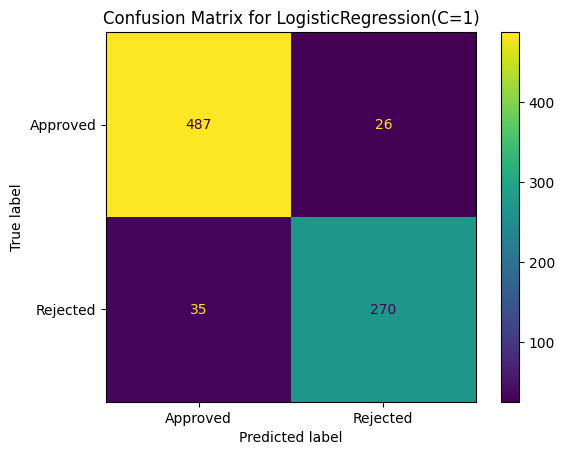

              precision    recall  f1-score   support

    Approved       0.93      0.95      0.94       513
    Rejected       0.91      0.89      0.90       305

    accuracy                           0.93       818
   macro avg       0.92      0.92      0.92       818
weighted avg       0.93      0.93      0.93       818
 



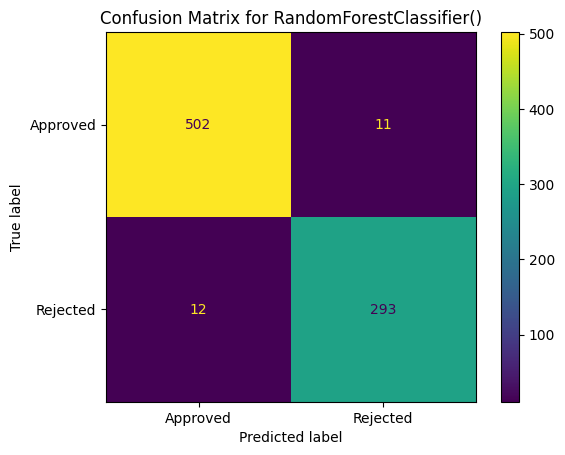

              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       513
    Rejected       0.96      0.96      0.96       305

    accuracy                           0.97       818
   macro avg       0.97      0.97      0.97       818
weighted avg       0.97      0.97      0.97       818
 



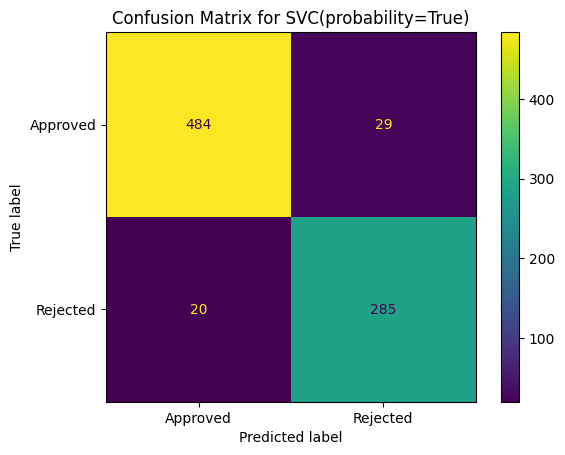

              precision    recall  f1-score   support

    Approved       0.96      0.94      0.95       513
    Rejected       0.91      0.93      0.92       305

    accuracy                           0.94       818
   macro avg       0.93      0.94      0.94       818
weighted avg       0.94      0.94      0.94       818
 



In [22]:
## Create confusion matrices for each of the 3 classifiers
for classifier in [log_clf, rf_clf, svm_clf]:
  pred = classifier.predict(X_test)
  cm = confusion_matrix(y_test, pred)
  classes = list(set(y_test))
  cm = ConfusionMatrixDisplay(cm, display_labels = classes)
  cm.plot()
  plt.title(f'Confusion Matrix for {classifier}')
  plt.show()
  print(classification_report(y_test, pred), '\n')

Based on the intial results of our baselines models, we are already achieving good weighted avg f1-scores for the models. These scores for each model are as follows:
* Logistic Regression: 0.93
* Random Forest: 0.97
* Support Vector Machine: 0.94

#### Balanced Data
We will now repeat the above experiments with the Approved loans downsampled from the dataset to match the Rejected loans out of interest of determining classifier performance.

In [23]:
## Downsample the dataframe so that loan_status is balanced by class ('Approved' will be reduced to match # 'Rejected')

df_majority = data_converted[data_converted.loan_status == 'Approved']
df_minority = data_converted[data_converted.loan_status == 'Rejected']
df_majority_downsampled = resample(df_majority, replace = False, n_samples = len(df_minority), random_state = 0)
df_converted_downsampled = pd.concat([df_majority_downsampled, df_minority])
print(df_converted_downsampled.loan_status.value_counts())
df_converted_downsampled.head(5)

loan_status
Approved    1535
Rejected    1535
Name: count, dtype: int64


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
952,0.223055,0.8,0.865979,0.632653,0.222222,0.866667,0.496575,0.263158,0.660668,0.564626,Approved,False,True,True,False
654,0.153233,0.8,0.927835,0.765306,0.444444,0.511667,0.825342,0.873684,0.753213,0.605442,Approved,True,False,True,False
1128,0.264292,0.2,0.577320,0.418367,0.555556,0.701667,0.041096,0.510526,0.434447,0.510204,Approved,True,False,False,True
2142,0.501874,0.0,0.185567,0.168367,0.000000,0.246667,0.095890,0.200000,0.174807,0.108844,Approved,False,True,True,False
3861,0.904639,0.2,0.536082,0.339286,0.111111,0.868333,0.400685,0.457895,0.503856,0.380952,Approved,False,True,False,True


In [24]:
## Setup the data split for the balanced data, again using a 80-20 train-test split

X = df_converted_downsampled.drop('loan_status', axis=1)
y = df_converted_downsampled['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # Setting to 0 for reproducibility

In [25]:
## Create and fit the following classifiers using default parameter values:
# logistic regression classifier
# random forest (using decision tree classifier as base estimator)
# support vector machine

log_clf = LogisticRegression(C = 1, solver = 'lbfgs', max_iter = 100).fit(X_train, y_train)
rf_clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', ccp_alpha = 0.0).fit(X_train, y_train)
svm_clf = svm.SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale', probability=True).fit(X_train, y_train)

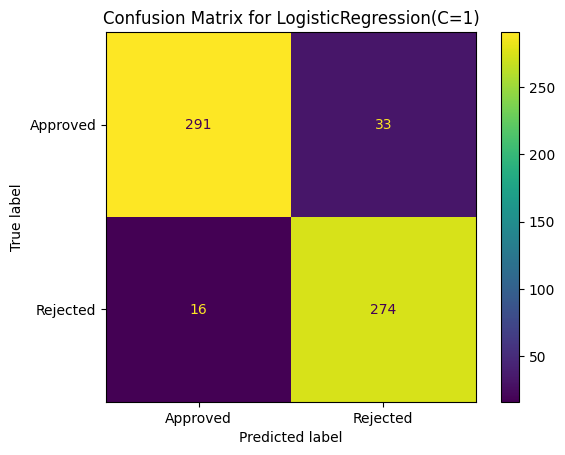

              precision    recall  f1-score   support

    Approved       0.95      0.90      0.92       324
    Rejected       0.89      0.94      0.92       290

    accuracy                           0.92       614
   macro avg       0.92      0.92      0.92       614
weighted avg       0.92      0.92      0.92       614
 



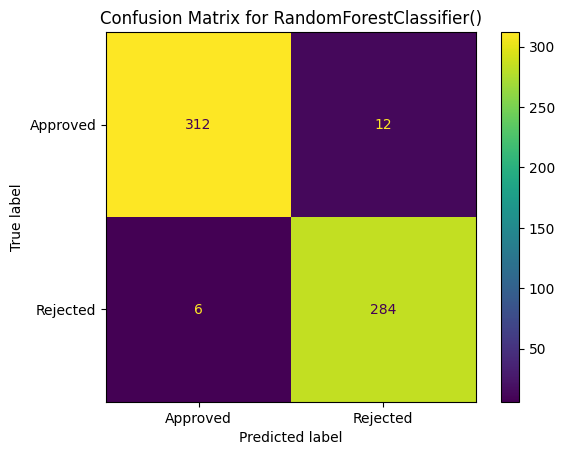

              precision    recall  f1-score   support

    Approved       0.98      0.96      0.97       324
    Rejected       0.96      0.98      0.97       290

    accuracy                           0.97       614
   macro avg       0.97      0.97      0.97       614
weighted avg       0.97      0.97      0.97       614
 



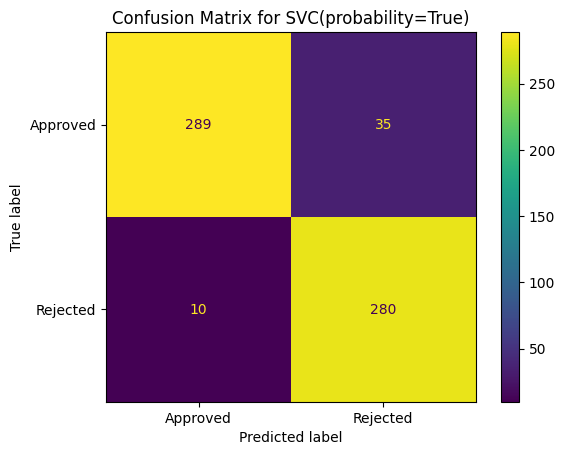

              precision    recall  f1-score   support

    Approved       0.97      0.89      0.93       324
    Rejected       0.89      0.97      0.93       290

    accuracy                           0.93       614
   macro avg       0.93      0.93      0.93       614
weighted avg       0.93      0.93      0.93       614
 



In [26]:
## Create confusion matrices for each of the 3 classifiers

for classifier in [log_clf, rf_clf, svm_clf]:
  pred = classifier.predict(X_test)
  cm = confusion_matrix(y_test, pred)
  classes = list(set(y_test))
  cm = ConfusionMatrixDisplay(cm, display_labels = classes)
  cm.plot()
  plt.title(f'Confusion Matrix for {classifier}')
  plt.show()
  print(classification_report(y_test, pred), '\n')

Based on these results, we are not achieving a better performance after downsampling, although close. The scores for each model are as follows:
* Logistic Regression: 0.92 (lower)
* Random Forest: 0.97 (same)
* Support Vector Machine: 0.93 (lower)

Since class distribution in of itself is important, we will stick with the imbalanced dataset for the remainder of the section. We will know focus on analyzing model performance and optimizing the models through hyperparameter tunning and gridsearch with k-fold cross validation.

### Hyperparameter Optimization with Gridsearch
We will now get into the section of hyperparemeter searching and gridsearch using cross validation.

In [27]:
## Re Setup the data split for the imbalanced data, using an 80-20 train-test split

X = data_converted.drop('loan_status', axis=1)
y = data_converted['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # Setting to 0 for reproducibility

Best Parameters: {'C': 1, 'max_iter': 50, 'solver': 'lbfgs'}
Best Score: 0.9161


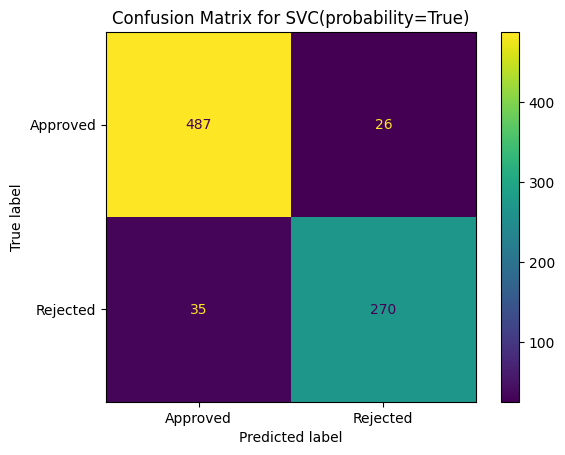

              precision    recall  f1-score   support

    Approved       0.93      0.95      0.94       513
    Rejected       0.91      0.89      0.90       305

    accuracy                           0.93       818
   macro avg       0.92      0.92      0.92       818
weighted avg       0.93      0.93      0.93       818



In [28]:
## We will perform gridsearch for log_clf using 5 folds for cross validation to obtain the best hyperparameters

# log_clf = LogisticRegression(C = 1, solver = 'lbfgs', max_iter = 100).fit(X_train, y_train) # Original
param_grid_log = {'C': [0.1, 0.5, 1, 5, 10], 'solver': ['lbfgs', 'liblinear'], 'max_iter': [10, 50, 100, 150, 200]}
grid_search_log = GridSearchCV(estimator=LogisticRegression(),
                                param_grid=param_grid_log,
                                cv=5,
                                scoring='f1_weighted').fit(X_train, y_train)

print("Best Parameters:", grid_search_log.best_params_)
print("Best Score:", round(grid_search_log.best_score_, 4))
best_log_clf = grid_search_log.best_estimator_

pred_log = best_log_clf.predict(X_test)
cm = confusion_matrix(y_test, pred_log)
classes = list(set(y_test))
cm = ConfusionMatrixDisplay(cm, display_labels = classes)
cm.plot()
plt.title(f'Confusion Matrix for {classifier}')
plt.show()
print(classification_report(y_test, pred_log))



The default baseline model used the following parameters:
* LogisticRegression(C = 1, solver = 'lbfgs', max_iter = 100)

While the best model parameters found above use:
* Best Parameters: {'C': 1, 'max_iter': 50, 'solver': 'lbfgs'}

However, both achieved a score of 0.93. This may be due to the random split of train and test data, although this implies a similar score as both C and solver were kept the same.

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9798


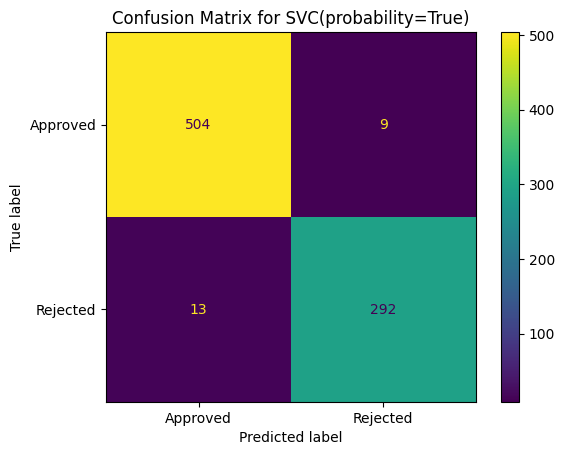

              precision    recall  f1-score   support

    Approved       0.97      0.98      0.98       513
    Rejected       0.97      0.96      0.96       305

    accuracy                           0.97       818
   macro avg       0.97      0.97      0.97       818
weighted avg       0.97      0.97      0.97       818



In [29]:
## We will perform gridsearch for rf_clf using 5 folds for cross validation to obtain the best hyperparameters

# rf_clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', ccp_alpha = 0.0).fit(X_train, y_train) # original
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'ccp_alpha': [0.0, 0.001, 0.01]
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=param_grid_rf,
                                cv=5,
                                scoring='f1_weighted').fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", round(grid_search_rf.best_score_, 4))
best_rf_clf = grid_search_rf.best_estimator_

pred_rf = best_rf_clf.predict(X_test)
cm = confusion_matrix(y_test, pred_rf)
classes = list(set(y_test))
cm = ConfusionMatrixDisplay(cm, display_labels = classes)
cm.plot()
plt.title(f'Confusion Matrix for {classifier}')
plt.show()
print(classification_report(y_test, pred_rf))


The default baseline model used the following parameters:
* RandomForestClassifier(n_estimators = 100, criterion = 'gini', ccp_alpha = 0.0).fit(X_train, y_train)

While the best model parameters found above use:
* Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}

Again, both achieved a score of 0.97, where may be due to the random split of train and test data. Between the two, the gini criterion remained the same.

##### Detour Analysis: Feature Selection
We will use the random forest classifier to determine the input feature importance.

In [30]:
## List the feature importances found by the best found random forest classifier

coefficients = best_rf_clf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': coefficients})
print(feature_importances.sort_values('importance', ascending = False).reset_index(drop = True))


                     feature  importance
0                cibil_score    0.766200
1                  loan_term    0.073666
2                loan_amount    0.029749
3   residential_assets_value    0.020504
4                    loan_id    0.019560
5        luxury_assets_value    0.019367
6               income_annum    0.018502
7    commercial_assets_value    0.018161
8           bank_asset_value    0.016212
9           no_of_dependents    0.009470
10         self_employed_Yes    0.002363
11          self_employed_No    0.002260
12        education_Graduate    0.002005
13    education_Not Graduate    0.001979


Important Note: As we suspected in the EDA section, **cibil_score** appeared to be the only promosing feature. With the importance at approximately 0.78 while all others below 0.1, the findings were verified.

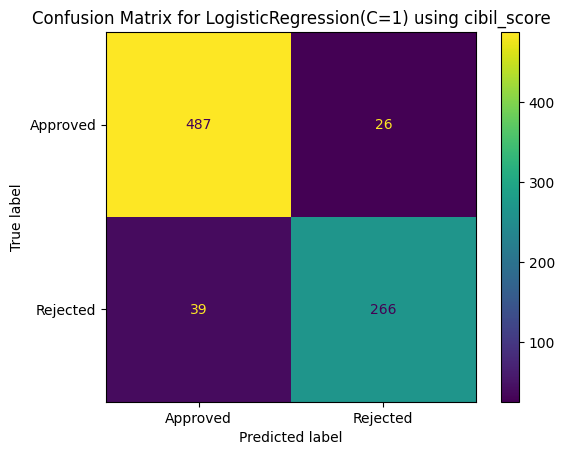

              precision    recall  f1-score   support

    Approved       0.93      0.95      0.94       513
    Rejected       0.91      0.87      0.89       305

    accuracy                           0.92       818
   macro avg       0.92      0.91      0.91       818
weighted avg       0.92      0.92      0.92       818
 



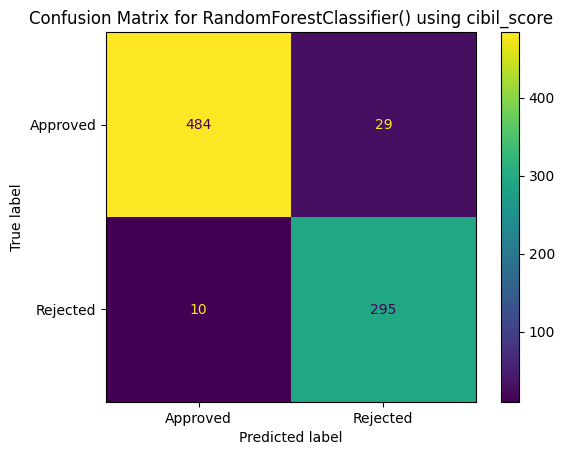

              precision    recall  f1-score   support

    Approved       0.98      0.94      0.96       513
    Rejected       0.91      0.97      0.94       305

    accuracy                           0.95       818
   macro avg       0.95      0.96      0.95       818
weighted avg       0.95      0.95      0.95       818
 



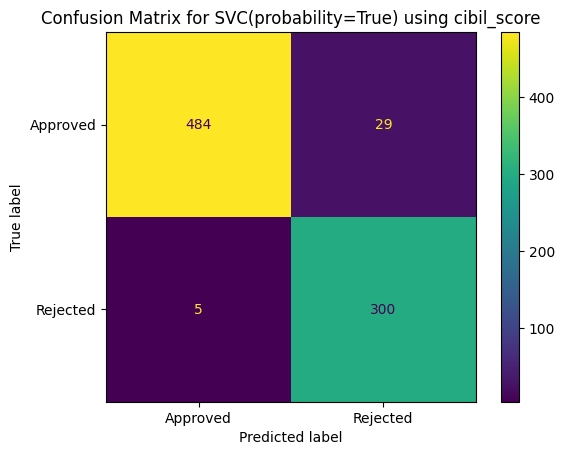

              precision    recall  f1-score   support

    Approved       0.99      0.94      0.97       513
    Rejected       0.91      0.98      0.95       305

    accuracy                           0.96       818
   macro avg       0.95      0.96      0.96       818
weighted avg       0.96      0.96      0.96       818
 



In [31]:
## Recreate the initial baseline model experiments with just using cibil_score as the input feature
# _rfc suffix appended so that original data is not impacted, also to note these findings are based on the rfc feature importance results
X_rfc = data_converted['cibil_score']
y_rfc = data_converted['loan_status']
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_rfc, y_rfc, test_size = 0.2, random_state = 0) # Setting to 0 for reproducibility
X_train_rfc = X_train_rfc.values.reshape(-1, 1)
X_test_rfc = X_test_rfc.values.reshape(-1, 1)

log_clf_rfc = LogisticRegression(C = 1, solver = 'lbfgs', max_iter = 100).fit(X_train_rfc, y_train_rfc)
rf_clf_rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini', ccp_alpha = 0.0, ).fit(X_train_rfc, y_train_rfc)
svm_clf_rfc = svm.SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale', probability=True).fit(X_train_rfc, y_train_rfc)
for classifier in [log_clf_rfc, rf_clf_rfc, svm_clf_rfc]:
  pred_rfc = classifier.predict(X_test_rfc)
  cm = confusion_matrix(y_test_rfc, pred_rfc)
  classes = list(set(y_test_rfc))
  cm = ConfusionMatrixDisplay(cm, display_labels = classes)
  cm.plot()
  plt.title(f'Confusion Matrix for {classifier} using cibil_score')
  plt.show()
  print(classification_report(y_test_rfc, pred_rfc), '\n')

The scores for logistic regression, random forest, and svm are found to respectively be:
* 0.92
* 0.96
* 0.96

The same models using all input features achieved the scores of:

* 0.92
* 0.97
* 0.93

The results show that while only the Support Vector Machine implementation improved, the scores were very close together and further indicates that
cibil_score may be the only feature of significance. The rest of the experiments
will continue to use all input features for consistency, though for a final model selection it may be best to just use cibil_score for the sake simplicity.

##### Return to Gridsearch for SVM

Best Parameters: {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Best Score: 0.9508


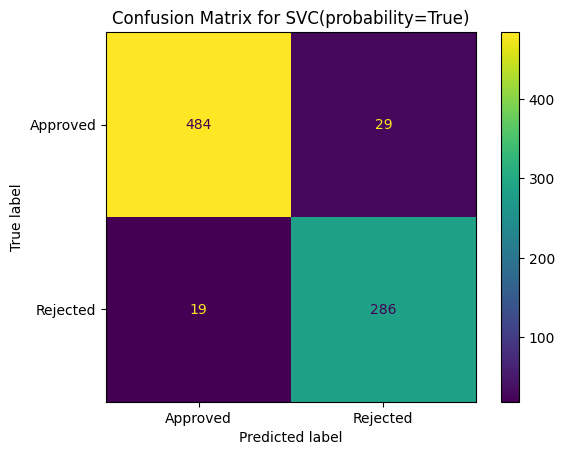

              precision    recall  f1-score   support

    Approved       0.96      0.94      0.95       513
    Rejected       0.91      0.94      0.92       305

    accuracy                           0.94       818
   macro avg       0.94      0.94      0.94       818
weighted avg       0.94      0.94      0.94       818



In [32]:
## We will perform gridsearch for svm_clf using 5 folds for cross validation to obtain the best hyperparameters

# svm_clf = svm.SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale', probability=True).fit(X_train, y_train) # original
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]
}

grid_search_svm = GridSearchCV(estimator=svm.SVC(probability=True),
                                param_grid=param_grid_svm,
                                cv=5,
                                scoring='f1_weighted').fit(X_train, y_train)

print("Best Parameters:", grid_search_svm.best_params_)
print("Best Score:", round(grid_search_svm.best_score_, 4))
best_svm_clf = grid_search_svm.best_estimator_

pred_svm = best_svm_clf.predict(X_test)
cm = confusion_matrix(y_test, pred_svm)
classes = list(set(y_test))
cm = ConfusionMatrixDisplay(cm, display_labels = classes)
cm.plot()
plt.title(f'Confusion Matrix for {classifier}')
plt.show()
print(classification_report(y_test, pred_svm))


The default baseline model used the following parameters:
* svm.SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale', probability=True)

While the best model parameters found above use:
* Best Parameters: {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

Again, both achieved a score of 0.94, where may be due to the random split of train and test data. Between the two, degree remained the same.

It appears that the baseline models already approximated / matched the best score these models could give, at least based on our chosen test dataset. Since gridsearch found these models better, it implies these sets of parameters will generally work better across different test sets, so they will be used for ROC Curves and other final analysis.

### ROC Curves
In this section, we will generate an ROC curve for each classifier followed by their respective classification performance using the acquired best threshold.

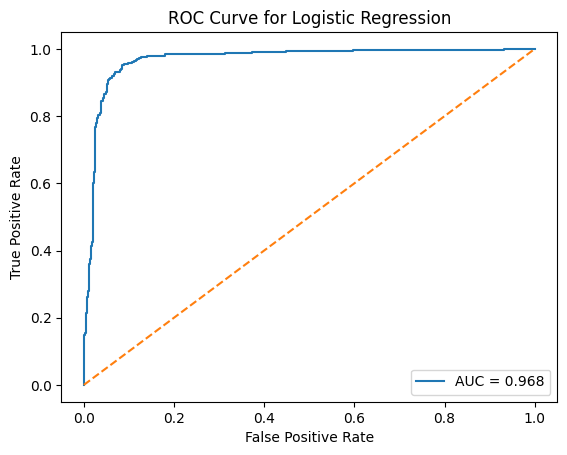

In [33]:
## Display an ROC Curve for our best found logistic regression classifier along with the resulting AUC

y_pred_proba = best_log_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.map({'Approved': 0, 'Rejected': 1}), y_pred_proba)
roc_auc = roc_auc_score(y_test.map({'Approved': 0, 'Rejected': 1}), y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label = f'AUC = {round(roc_auc, 3)}')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], '--')
plt.legend(loc = "lower right")
plt.show()

Threshold value is: 0.3744


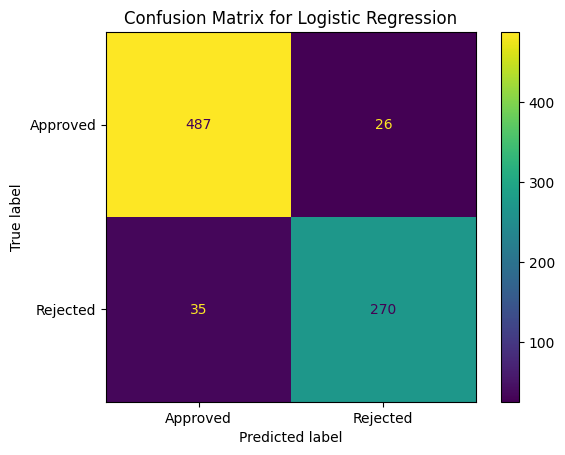

              precision    recall  f1-score   support

    Approved       0.97      0.91      0.94       513
    Rejected       0.87      0.95      0.91       305

    accuracy                           0.93       818
   macro avg       0.92      0.93      0.92       818
weighted avg       0.93      0.93      0.93       818



In [34]:
## Finds the best probability threshold to use based on the ROC findings,
# then generates a confusion matrix and classification report.

best = np.argmax(tpr - fpr)
best_threshold = thresholds[best]
print("Threshold value is:", round(best_threshold, 4))
y_pred_probability_classified = (y_pred_proba > best_threshold).astype(int)
y_pred_strings_form = np.where(y_pred_probability_classified == 1, 'Rejected', 'Approved')

pred_log = best_log_clf.predict(X_test)
cm = confusion_matrix(y_test, pred_log)
classes = list(set(y_test))
cm = ConfusionMatrixDisplay(cm, display_labels = classes)
cm.plot()
plt.title(f'Confusion Matrix for Logistic Regression')
plt.show()
print(classification_report(y_test, y_pred_strings_form))

The weighted avg f1-score for the baseline logistic regression model was 0.93 and with the new best threshold it is still 0.93. The model's performance has remained unchanged. This is likely due to the baseline model already handling threshold tunning.

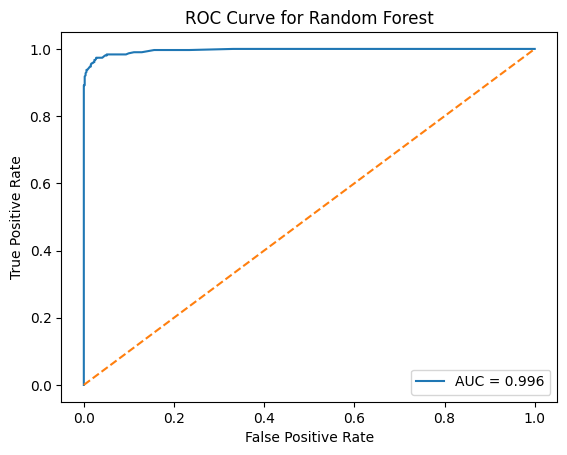

In [35]:
## Display an ROC Curve for our best found random forest classifier along with the resulting AUC

y_pred_proba = best_rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.map({'Approved': 0, 'Rejected': 1}), y_pred_proba)
roc_auc = roc_auc_score(y_test.map({'Approved': 0, 'Rejected': 1}), y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label = f'AUC = {round(roc_auc, 3)}')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], '--')
plt.legend(loc = "lower right")
plt.show()

Threshold value is: 0.4133


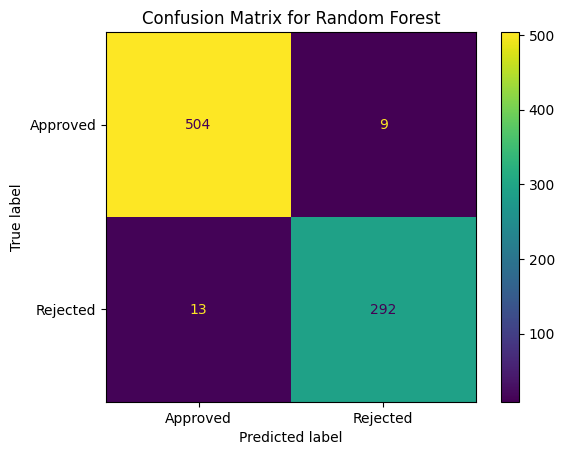

              precision    recall  f1-score   support

    Approved       0.98      0.97      0.98       513
    Rejected       0.95      0.97      0.96       305

    accuracy                           0.97       818
   macro avg       0.97      0.97      0.97       818
weighted avg       0.97      0.97      0.97       818



In [36]:
## Finds the best probability threshold to use based on the ROC findings,
# then generates a confusion matrix and classification report.

best = np.argmax(tpr - fpr)
best_threshold = thresholds[best]
print("Threshold value is:", round(best_threshold, 4))
y_pred_probability_classified = (y_pred_proba > best_threshold).astype(int)
y_pred_strings_form = np.where(y_pred_probability_classified == 1, 'Rejected', 'Approved')

pred_rf = best_rf_clf.predict(X_test)
cm = confusion_matrix(y_test, pred_rf)
classes = list(set(y_test))
cm = ConfusionMatrixDisplay(cm, display_labels = classes)
cm.plot()
plt.title(f'Confusion Matrix for Random Forest')
plt.show()
print(classification_report(y_test, y_pred_strings_form))

The weighted avg f1-score for the baseline random forest model was 0.97 and with the new best threshold it was also 0.97. The model's performance has remained unchanged.

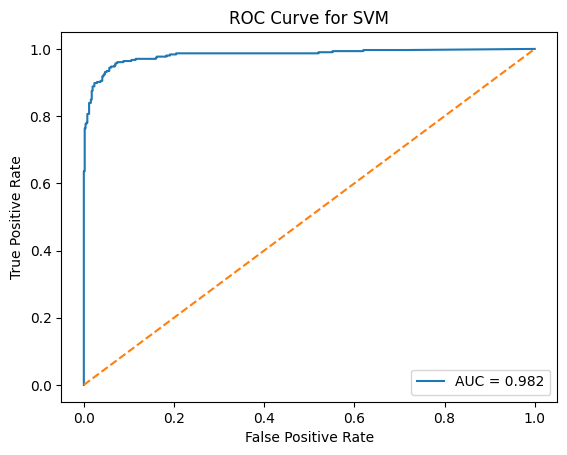

In [37]:
## Display an ROC Curve for our best found svm classifier along with the resulting AUC

y_pred_proba = best_svm_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.map({'Approved': 0, 'Rejected': 1}), y_pred_proba)
roc_auc = roc_auc_score(y_test.map({'Approved': 0, 'Rejected': 1}), y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label = f'AUC = {round(roc_auc, 3)}')
plt.title('ROC Curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], '--')
plt.legend(loc = "lower right")
plt.show()

Threshold value is: 0.4843


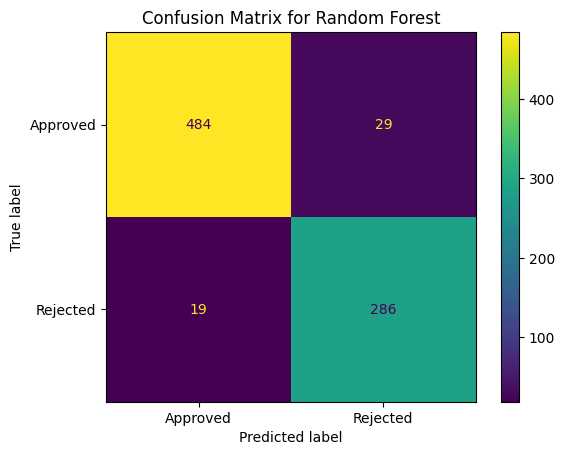

              precision    recall  f1-score   support

    Approved       0.96      0.94      0.95       513
    Rejected       0.91      0.94      0.92       305

    accuracy                           0.94       818
   macro avg       0.94      0.94      0.94       818
weighted avg       0.94      0.94      0.94       818



In [38]:
## Finds the best probability threshold to use based on the ROC findings,
# then generates a confusion matrix and classification report.

best = np.argmax(tpr - fpr)
best_threshold = thresholds[best]
print("Threshold value is:", round(best_threshold, 4))
y_pred_probability_classified = (y_pred_proba > best_threshold).astype(int)
y_pred_strings_form = np.where(y_pred_probability_classified == 1, 'Rejected', 'Approved')

pred_svm = best_svm_clf.predict(X_test)
cm = confusion_matrix(y_test, pred_svm)
classes = list(set(y_test))
cm = ConfusionMatrixDisplay(cm, display_labels = classes)
cm.plot()
plt.title(f'Confusion Matrix for Random Forest')
plt.show()
print(classification_report(y_test, y_pred_strings_form))

The weighted avg f1-score for the baseline SVM model was 0.94 and with the new best threshold it was also 0.94. The model's performance has remained unchanged.

### Conclusions
In this section, I will cover the best model(s), best features found, and other information regarding our results in the previous Experiment section of this project. I will also cover what I have learned, including takeaways from this project and why experiments covered in this project did and did not work in terms of developing and optimizing a model for this loan approval project.

To conclude this project, I have found that of the three classifiers I have tried, that the ensemble based random forest classifier using decision trees as the base estimator to be the best performing model. The metric I chose to decide this was f1-score, since it is like accuracy but works better for handling the precision / recall balance for imbalanced datasets (imbalanced dependent variable being loan_status). Also, from the random forest classifier, we determined that a loan candidates credit history, being cibil_score, was the only significant feature of the explanatory variables (input features). Training models using just this variable resulted in an f1-score approximately the same as using the entire feature set (except for svm which was slightly increased). What went well in this project was generating the data visualizations and related statistics for the input features in terms of their relation to loan_status. This is because they demonstrated what we found later in terms of their potential for being good predictors. What did not go as well was using the threshold found by ROC analysis, since that did not improve the f1-score of the respective models. Similarily, the hyperparameter tunning did not result in better performing models given the static test set used, though may be better for other splits. Due to this, a takeaway from this project would be to generate a range of f1-scores based on different train-test splits to get a better idea of the expected actual f1-score for a model. An addition to this project that would further improve it would be to add more models. In particular, since random forest performed well, other ensemble based classifiers may achieve similar or better performance.

This concludes the project, thank you for your time.